# Ozone Evaluation

In [1]:
require "distribution"
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

## Variables

In [2]:
prefix = "20160221_O3"

dir = "../DOAS/"

#dir_images = "../images/"


filetype = ".csv"
#filetype_images = ".png"

postfix_flux = "_fluxes"

nil

In [3]:
input = dir + prefix + filetype
input_flux = dir + prefix + postfix_flux + filetype
nil

## Data Preparation

In [4]:
d = DataFrame.from_csv(input)
d.vectors = Index.new(d.vectors.to_a.map{|i| i.to_sym})

d.recode_rows do |row|
  row[:no2_err] = row[:no2_err].to_f*2.0
  row[:o3_err] = row[:o3_err].to_f*2.0
  
  row
end


d.index = DateTimeIndex.new(d[:timestamp])
d.head
nil

In [5]:
d[:o3_mean] = d[:o3].rolling_mean.to_a
d[:no2_mean] = d[:no2].rolling_mean.to_a
d.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,o3_mean,no2_mean
2016-02-21T18:03:19+01:00,0.0717802548338392,0.146067133635933,-1593727.52453878,1408048.19000272,0,0.531918032396342,0.1983378971004088,2981.4536350251,3512.84821661864,2016-02-21T18:03:19+01:00,,
2016-02-21T18:03:51+01:00,-0.0525312220741131,0.141051106554376,-2777264.77829908,1348493.46558948,1,2.29408564506789,0.1902989596901088,10183.1713926202,3375.1125356934,2016-02-21T18:03:51+01:00,,
2016-02-21T18:04:22+01:00,0.0125600813579203,0.157511009732122,-3222126.32233156,1506897.16714803,2,2.05935362103061,0.212576319688826,11419.0006559583,3772.8074131112,2016-02-21T18:04:22+01:00,,
2016-02-21T18:04:53+01:00,-0.0116090317014627,0.149958620961909,-2595218.63020406,1431586.87955804,3,1.74483968415124,0.201870015513144,11672.6803268694,3585.02023935112,2016-02-21T18:04:53+01:00,,
2016-02-21T18:05:24+01:00,0.0932710838424843,0.162543567005877,-2605206.98580666,1542896.42829019,4,1.62971199166318,0.217537758050568,11995.5939282138,3865.57542932368,2016-02-21T18:05:24+01:00,,
2016-02-21T18:05:55+01:00,-0.149853896275688,0.16036109850534,-1743639.06635925,1522294.49069655,5,1.49186928643562,0.214592937636126,12135.606287878,3814.071270131,2016-02-21T18:05:55+01:00,,
2016-02-21T18:06:26+01:00,-0.0915430629863278,0.165867087462713,-1550915.830091,1574469.46207387,6,1.41629656135691,0.221924981052294,12176.0457726773,3944.90874372606,2016-02-21T18:06:26+01:00,,
2016-02-21T18:06:57+01:00,-0.0778686055034947,0.153684952070335,-2296658.87813164,1450440.43388411,7,1.2726763793783,0.204401269833,12550.2741095124,3635.86906255378,2016-02-21T18:06:57+01:00,,
2016-02-21T18:07:28+01:00,-0.0891659918492483,0.162286681898755,-2299584.87385389,1555803.689469,8,1.21398784145929,0.219221731928402,12089.3616269613,3895.52375609038,2016-02-21T18:07:28+01:00,,
2016-02-21T18:07:59+01:00,-0.0877278092028947,0.156020983524684,-2549962.76567983,1481150.01192852,9,1.1340969580802,0.208695523857574,12075.2912685822,3710.96419283692,2016-02-21T18:07:59+01:00,10927.847900429799,1.478883600101958


In [6]:
flux = DataFrame.from_csv(input_flux)
flux.vectors = Index.new(flux.vectors.to_a.map{|i| i.to_sym})
flux

,flux,no2,no2_err,o3,o3_err,start,stop
0,0.3,0.43702905658934443,0.007376196224580995,11859.609153314415,131.7325525685821,36,117
1,0.2,0.15657798216184213,0.010144866890529645,11259.323608182942,181.3690165631213,125,170
2,0.1,0.0025134671960576524,0.009294919727794561,8091.4531183035415,165.9673866391356,175,228
3,0.05,-0.002343354206975483,0.009414343387773355,5036.018225908381,167.9123363926414,235,283
4,0.03,-0.011606565161768697,0.008938051557361245,3154.1419908339,159.05132915323884,290,345


## Timeseries Plots

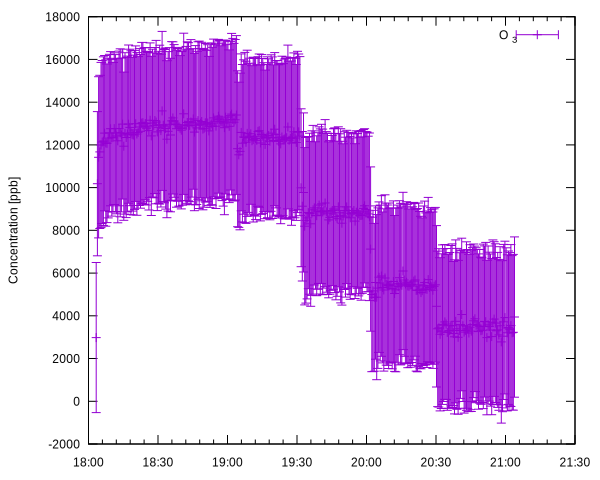

In [7]:
d.index = DateTimeIndex.new(d[:timestamp].to_a)

plot_o3 = Plot.new(
  [d[:o3, :o3_err], with: "yerrorbars", title: "O_3"],
  #[d[:o3_mean], with: "lines", title: "O_3 (mean)"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

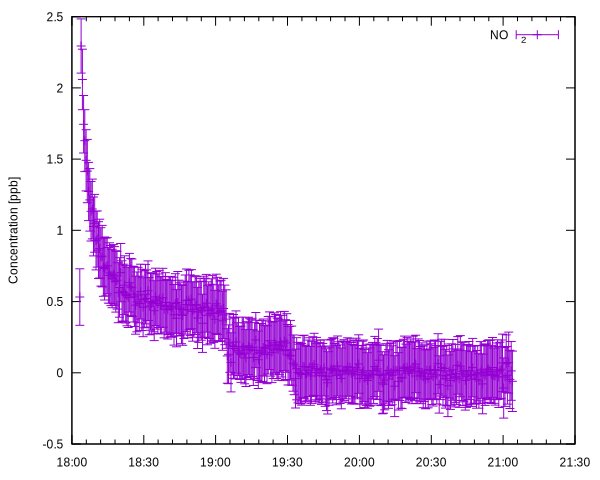

In [8]:
d.index = DateTimeIndex.new(d[:timestamp].to_a)

plot_no2 = Plot.new(
  [d[:no2, :no2_err], with: "yerrorbars", title: "NO_2"],
  #[d[:no2_mean], with: "lines", title: "NO_2 (mean)"],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

# Averaging

In [9]:
d.index = Index.new(d[:index].to_a)

flux.recode_rows do |row|
  i_alt = row[:start]
  t_alt = d.row[i_alt][:timestamp]
  o3_alt = d.row[i_alt][:o3]
  no2_alt = d.row[i_alt][:no2]
  o3_err_alt = d.row[i_alt][:o3_err]
  no2_err_alt = d.row[i_alt][:no2_err]
  
  weight = 0.0
  o3_mean = 0.0
  no2_mean = 0.0
  
  o3_mean_err = 0.0
  no2_mean_err = 0.0
  
  ((i_alt+1)..row[:stop]).each do |i|
    t = d.row[i][:timestamp]
    o3 = d.row[i][:o3]
    no2 = d.row[i][:no2]
    o3_err = d.row[i][:o3_err]
    no2_err = d.row[i][:no2_err]
    
    dt = t - t_alt
    
    o3_mean += 0.5*(o3 + o3_alt)*dt
    no2_mean += 0.5*(no2 + no2_alt)*dt
    
    o3_mean_err += (o3_err_alt**2 + o3_err**2)*(0.5*dt)**2
    no2_mean_err += (no2_err_alt**2 + no2_err**2)*(0.5*dt)**2
    
    weight += dt
    
    t_alt = t
    o3_alt = o3
    no2_alt = no2
  end
  
  row[:o3] = o3_mean/weight
  row[:no2] = no2_mean/weight
  row[:o3_err] = Math::sqrt(o3_mean_err)/weight
  row[:no2_err] = Math::sqrt(no2_mean_err)/weight
  
  row
end


flux

ArgumentError: Size of supplied index 350 does not match size of DataFrame

## Write Fluxes

In [10]:
flux.write_csv(input_flux)

## Flux Plots

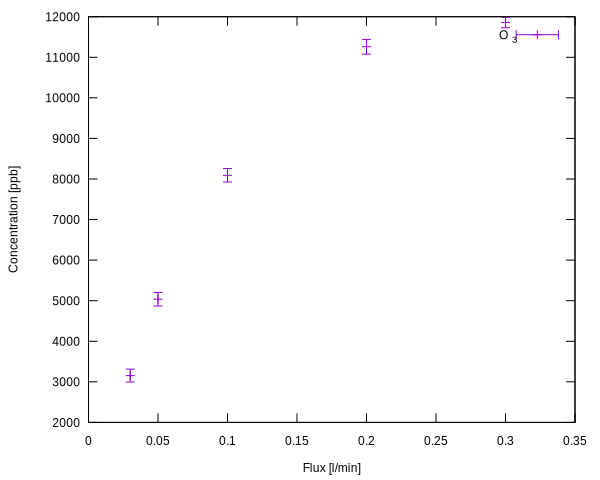

In [11]:
o3_flux_plot = Plot.new(
  [flux[:flux, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  xlabel: "Flux [l/min]",
  ylabel: "Concentration [ppb]",
  xrange: 0..0.35)

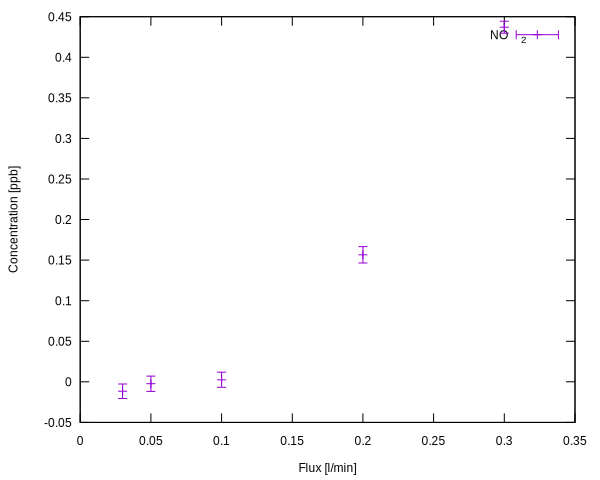

In [12]:
no2_flux_plot = Plot.new(
  [flux[:flux, :no2, :no2_err], using: "2:3:4", with: "yerrorbars", title: "NO_2"],
  xlabel: "Flux [l/min]",
  ylabel: "Concentration [ppb]",
  xrange: 0..0.35)